![](https://storage.googleapis.com/kaggle-datasets-images/42674/74935/572dbd518d7eceb1d680c1a36fde9a40/dataset-cover.jpg?t=2018-08-11-07-48-58)

# Step4 - Clustering

### Mall Customer Segmentation Data: Market Basket Analysis(https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
#### Mall Customer Segmentation Data 데이터를 통해, 고객을 뷴류하는 문제를 Clustering 기법으로 풀어봅니다.

# Learning Plan

#### 이 과정을 통해서 배울 수 있는 것은 아래와 같습니다.
- 첫째, Clustring을 이용한 데이터 분석의 전체 Workflow
- 둘째, ML - Clustering 알고리즘

### Lesson 4-1: Overview - Clustering

### Lesson 4-2: EDA

### Lesson 4-3: Preprocessing

### Lesson 4-4: Model Selection

### Lesson 4-5: Customer Segmentation

# Reference 

- '파이썬 머신러닝 완벽가이드' by 권철민: https://wikibook.co.kr/ml-definitive-guide/
- 'Customer Segmentation and Analysis' by [Kushal Mahindrakar](https://www.kaggle.com/kushal1996) : https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

# Lesson 4-1: Overview - Clustering

## 4-1-1 : 클러스터링 이란?

### 클러스터 (Cluster)

데이터 포인트들(data objects)의 모임

- 같은 그룹(or cluster) 안에서는 서로 비슷하고
- 서로 다른 그룹 사이에는 비슷하지 않다

### 클러스터링 (Clustering, cluster analysis, data segmentation)

- 데이터 포인트들을 클러스터들로 나누는 것
- 즉, 데이터셋에서 하위그룹(subgroup)을 찾는 것이다.

### 분류 vs. 클러스터링

- 클러스터링 : 비지도 학습 (unsupervised learning)
- 분류 : 지도 학습 (supervised learning)

### 클러스터링은 언제 사용하나요

- 데이터에서 인사이트를 얻기 위해
  - 데이터의 요약
- 다른 데이터 마이닝 작업의 중간 과정으로
  - feature extraction
  - outlier detection. 어떤 클러스터에서도 멀리 떨어져 있는 데이터들
- 데이터 압축
  - 이미지 압축 등
- 추천 시스템
  - 비슷한 유저나 비슷한 제품을 찾기
- 비즈니스
  - market segmentation

### 클러스터링의 종류

- partitioning criteria
  - single level vs. hierarchical partitioning
- separation of clusters
  - 배제적(exclusive) : 한 데이터 포인트는 한 클러스터에만 속한다.
    - 예) 한 고객은 한 군집에만 속함
  - 비배제적(non-exclusive)
    - 예) 한 문서는 여러 토픽에 속함
- 유사도 지표(similarity measure)
  - Distance-based
  - connectivity-based
- 클러스터링 공간(Clustering space)
  - Full space vs. subspaces

### 클러스터링에서 어려운 점

- Quality
  - numerical, categorical, text, multimedia, networks 등 다양한 형식의 속성들 처리
  - 불규칙한 모양의 클러스터 발견하기
  - 노이즈가 있는 데이터 다루기
- Scalability
  - 샘플이 아닌 모든 데이터 클러스터링 하기
  - 높은 차원 다루기
  - 점진적(incremental or stream) 입력 다루기. 입력 순서에 민감하지 않기
- Constraint-based clustering
  - User-given preferences or constraints
- 해석가능성과 사용가능성(interpretability and usability)
- (+) (reproducability)


## 4-1-2 : 클러스터링 기법들(Clustering methodologies)

* K-means clustering
  * 미리 정해진 숫자의 클러스터로 클러스터링을 한다.
* Hierarchical clustering
  * 몇 개의 클러스터를 원하는지 모를 때
  * 데이터가 dendrogram이라는 트리 모양으로 나타내진다.
  * 그 뒤 몇 개의 클러스터를 원하는지 선택한다.

### 4-1-2-1 :  K-means clustering

### 알고리즘
* 먼저 원하는 클러스터의 개수 K를 고른다.
* 각각의 데이터 포인트마다 무작위로 1부터 K까지의 클러스터 번호를 지정한다. (초기화)
* 클러스터 할당(assignment)이 바뀌지 않을 때까지 다음을 반복한다.
    * 각각의 클러스터에 속한 데이터 포인트들을 평균내어, 클러스터의 중심(centroid)을 계산한다.
    * 각각의 데이터 포인트마다 가장 가까운 중심(centroid)를 가진 클러스터에 할당한다.

![k-means](https://files.slack.com/files-pri/T25783BPY-F685XR0B0/screenshot.png?pub_secret=4819dac9f5)

### 초기화 방법

* 무작위로 공간 상에서 중심(centroid)를 지정하기
* 무작위로 K개의 데이터 포인트를 골라서 각각의 클러스터 중심으로 지정하기

### 특징

* 모든 데이터 포인트는 K개 클러스터 중에 하나에 속한다.
* 어떤 데이터 포인트도 두 개 이상의 클러스터에 속할 수 없다.
* 랜덤성이 있다.
* 클러스터 사이의 순서는 없다.

### 수학적 인사이트

* 좋은 클러스터링 : 클러스터 내의 분산(within-cluster variation)이 작은 클러스터링

  $$
  minimize_{C_1, ..., C_K}{\sum^K_{k=1}W(C_k)}
  $$

  $$
  W(C_k) = \frac{1}{|C_k|}\sum_{i, i'\in C_k}\sum^p_{j=1}(x_{ij} - x_{i'j})^2
  $$

  * $W(C_k)$는 k번째 클러스터의 클러스터 내 분산(within-cluster variation)
  * $|C_k|$는 k번째 클러스터에 속하는 데이터 포인트의 개수
  * k번째 클러스터 내 분산은 k번째 클러스터에 속하는 모든 데이터 포인트들의 쌍 사이의 거리를 더하고 데이터의 개수로 나눈 것이다.

### 클러스터 내 분산을 최소화하는 클러스터링 찾기

  * 매우 어려운 문제이다.
  * n개의 데이터포인트를 K개의 클러스터로 나누는 데는 K^n개의 방법이 있기 때문
  * K-means 알고리즘은 local optimum을 찾아주는 근사 알고리즘이다.
  * 알고리즘 핵심 : 매번 iteration을 할 때마다, $W(C_k)$는 줄어들기만 할 뿐 증가하지 않는다.

### k-means 알고리즘을 여러번 해서 서로 다른 결과를 얻었다면

* 클러스터 내 분산이 작은 쪽을 선택한다.

![k-means](https://files.slack.com/files-pri/T25783BPY-F66QK1T09/screenshot.png?pub_secret=de082ff143)

### 4-1-2-1 :  계층형 클러스터링 (Hierarchical Clustering)

### 알고리즘
* 데이터 포인트를 각각 데이터 1개를 갖고 있는 클러스터라고 본다.
* 더 이상 할 게 없을 때까지 다음을 반복한다.
    * 지금 있는 모든 클러스터들 간의 거리(dissimmilarities)를 계산한다.
    * 가장 거리가 작은 두 클러스터를 합친다. (이 때 두 클러스터 간의 거리가 dendrogram에서 세로축의 값이 된다.)

![linkage](https://files.slack.com/files-pri/T25783BPY-F67L0G8FL/screenshot.png?pub_secret=a17e0b8b58)

### 특징
* 계층형 클러스터링 (Hierarchical clustering)은 클러스터 개수를 미리 지정하지 않아도 된다.
* 데이터를 트리 모양으로 나타내는 dendrogram을 만들어낸다.

### Dendrogram

![dendrogram](https://files.slack.com/files-pri/T25783BPY-F67LYJ084/screenshot.png?pub_secret=2584fdb577)

![example](https://files.slack.com/files-pri/T25783BPY-F67NEQP8D/screenshot.png?pub_secret=2af0ac1ea5)

### Dendrogram 해석
  * Dendrogram의 '잎'은 각각의 데이터 포인트들이다.
  * 트리 위로 올라가며 가장 가까운 데이터 포인트들끼리 합쳐져서 가지(branch)를 만든다.
  * 더 위로 올라가면 가지(branch)들이 다른 잎(leave)이나 가지(branch)와 합쳐진다.
  * 가까운 가지일 수록 합쳐지는 게 더 빨리 (tree 아래 부분에서) 일어난다.
  * 즉, 나중에 (tree의 윗부분에서) 합쳐질 수록 두 가지가 다르다는 것 뜻한다.

### dendrogram 기반으로 클러스터링 하기
  * 수평선 방향으로 어디에서 자를지 결정하면 클러스터링이 결정된다.
  * 즉, 어느 거리(distance) 이하의 가지까지만 합쳐질 수 있게 하면 클러스터링이 결정된다.
  * 하나의 dendrogram에서 어떤 개수의 클러스터도 구할 수 있다.
  * dendrogram을 눈으로 보고 그럴 듯한 클러스터 개수를 찾아낼 수 있는 것이 장점이다.

### 왜 Hierarchical 이라고 하나요?
  * 클러스터 개수를 줄여갈 수록, 항상 기존 클러스터가 합쳐져서 더 큰 클러스터를 형성한다.
  * 클러스터 개수를 늘여갈 수록, 항상 기존 클러스터가 나눠져서 더 작은 클러스터가 된다.

![dendrogram2](https://files.slack.com/files-pri/T25783BPY-F67378VQR/screenshot.png?pub_secret=8107439c53)

### dendrogram을 해석할 때 흔히 하는 실수
  * 위 그림에서, 5와 7은 상당히 비슷하다. (맞음)
  * 1과 6도 상당히 비슷하다. (맞음)
  * 9와 2는 비슷하다. (틀림)
  * 9는 8, 5, 7보다 2에 더 가깝지 않다.
  * dendrogram을 그릴 때 leave의 순서는 중요하지 않기 때문에, 가로축 방향으로 얼마나 가까운지는 의미가 없다.
  * 오직 두 가지(branches)가 합쳐지는 순간의 세로축의 값(distance)이 두 그룹이 얼마나 비슷한지를 알려주는 척도이다.

### 거리를 어떻게 측정할 것인가

두 가지 거리를 정의해야 한다.
1. 두 데이터 포인트 사이의 거리(dissimilarity)
    * 보통 유클리드 거리(Euclidean distance)가 쓰인다.
    * 다른 거리도 쓸 수 있다.
2. 두 클러스터(cluster) 사이의 거리(dissimilarity)
    * 거리(dissimilarity)의 일반화된 개념이다.
    * linkage라고 부른다.

### Linkage의 종류
  * Complete
    * 최대 클러스터간 거리 (Maximal intercluster dissimilarity). A 클러스터에 속한 점들과 B 클러스터에 속한 점들 사이의 거리를 모두 계산해서, 가장 큰 거리가 두 클러스터 사이의 거리가 된다.
  * Single
    * 최소 클러스터간 거리 (Minimal intercluster dissimilarity). 가장 작은 거리가 두 클러스터 사이의 거리가 된다. 이 방식으로 하면 보통 한 클러스터가 계속해서 커지는 결과가 나온다.
  * Average
    * 평균 클러스터간 거리 (Average intercluster dissimilarity). 두 클러스터에 속한 점들 사이 거리를 구해서 평균 낸다.
  * Centroid
    * 중심(centroid) 사이의 거리. 중심은 그 클러스터에 속한 점들의 평균으로 결정된다.

### Average나 complete가 가장 자주 쓰인다.
  * 더 균형잡힌 클러스터가 만들어진다.
  * single은 보통 한 클러스터가 계속 커지는 문제가 있다.
  * centroid는 inversion이라는 문제가 있다. 즉, dendrogram 상에서 두 클러스터가 각각의 클러스터보다 낮은 높이에서 합쳐지는 것이다. dendrogram을 그릴 때 문제가 생긴다.

![single](https://files.slack.com/files-pri/T25783BPY-F68ELJHM4/screenshot.png?pub_secret=3b536cefdf)

## K-means vs. Hierarchical clustering

### 계층형 클러스터링의 장점
- 클러스터 개수를 미리 결정하지 않아도 된다.
- dendrogram으로 데이터를 시각화할 수 있다.
- 랜덤성이 없다.

### K means의 장점
- 상대적으로 빠르다.
- 어떤 데이터셋에서는 큰 클러스터링이 작은 클러스터링을 포함하는 것이 부적절할 수 있다.
  - 예를 들어, 남녀 비율이 50 대 50 이며 미국인, 일본인, 프랑스인 세 인종으로 삼등분 되어 있는 사람들의 경우 2개로 나눌 때와 3개로 나눌 때 가장 적절한 클러스터링이 다를 것이다.
- K-means는 보통 주어진 클러스터 개수에 대해서 더 나은 결과를 낳는다고 알려져 있다.

## 4-1-3 : 클러스터링 평가하기 (Clustering Evaluation)

적절한 클러스터 개수 구하기

### Elbow method

cost의 감소 속도가 줄어드는 지점에서 끊기

K-means의 경우, cost function이 있다!

$$
minimize_{C_1, ..., C_K}{\sum^K_{k=1}W(C_k)}
$$

이걸로 평가하면 안되나?

## K-means의 클러스터 개수 대비 -cost
![elbow](https://files.slack.com/files-pri/T25783BPY-F688Y888M/elbow.png?pub_secret=ccc52addb0)

- 문제는, 클러스터 개수가 증가할 수록 cost는 계속해서 감소한다. 
- 클러스터 개수가 많을 수록 centroid와 데이터 포인트 간의 거리는 작아지기 때문이다.
- 그럼 클러스터 개수가 많을 수록 좋은건가? 그건 아니다.

### Elbow method 알고리즘(?)

* 그래프를 보면 처음에는 급격히 cost가 감소하다가 어느 순간 정체된다.
* 감소세가 정체되는 지점에서 클러스터 개수를 정하자

### 한계

* 감소세가 정체되는 부분이 언제인지 결정하는 것은 주관적이다
* 감소분이 최소인 지점이 항상 가장 좋은 클러스터링은 아니다.

## Silhouette

 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타낸다.
  * 클러스터 안의 거리가 짧을 수록 좋고(cohesion) 다른 클러스터와의 거리는 멀수록 좋다.(separation)
  * 데이터 포인트 별로 값을 구할 수 있다.
  * 실루엣은 -1부터 1 사이의 값을 가진다.
  * 높을 수록 좋다.
  *  어떤 클러스터링 알고리즘이든지 구할 수 있다.

### 계산 방법

  * i번째 데이터 포인트에 대해서
  * a(i)는 같은 클러스터 안에 있는 다른 데이터 포인트와의 평균 거리(dissimilarity)
    * a(i)는 i번째 데이터 포인트가 클러스터에 얼마나 잘 맞는지 측정한다. 
    * 낮을 수록 더 잘 속해있는 것
  * b(i)는 i가 속하지 않은 다른 클러스터와의 평균 거리 중 가장 작은 거리이다.
    * 내가 속하지 않은 가장 가까운 클러스터, 즉 이웃 클러스터(neighbouring cluster)와의 거리

### 실루엣 정의
![sihouette](https://files.slack.com/files-pri/T25783BPY-F690TC8FQ/screenshot.png?pub_secret=7d798bd990)

  * b(i)가 a(i)보다 많이 클수록 1에 가까워지고, 좋다.
  * 0이면 지금 클러스터나 이웃 클러스터나 어디 있든 상관 없다는 얘기

![silhouette2](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)

![silhouette2](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)

![silhouette2](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

![silhouette2](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

![silhouette2](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)

## 4-1-4 :  Clustering 실습

In [7]:
import numpy as np
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

## Hierarchical

In [8]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

In [9]:
AgglomerativeClustering??

### Dendrogram

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
Z = linkage(X, 'ward')

`ward`는 클러스터 내 총 분산(total within-cluster variance)을 최소화 시키는 linkage 방법

## Z 들여다보기

In [24]:
Z.shape

(149, 4)

In [25]:
Z[0]

array([  5.20000000e+01,   5.30000000e+01,   4.15105485e-02,
         2.00000000e+00])

`[idx1, idx2, dist, sample_count]`

첫번째로 9번째 데이터 포인트와 34번째 데이터 포인트가 merge되었다. 거리는 0이었고 새로 만들어진 클러스터는 2개 샘플을 갖고 있다.

In [15]:
Z[1]

array([  1.40000000e+01,   7.90000000e+01,   5.91375926e-02,
         2.00000000e+00])

In [16]:
Z[:10].round(0)

array([[  52.,   53.,    0.,    2.],
       [  14.,   79.,    0.,    2.],
       [  33.,   68.,    0.,    2.],
       [  17.,   73.,    0.,    2.],
       [   1.,    8.,    0.,    2.],
       [  85.,   95.,    0.,    2.],
       [ 108.,  131.,    0.,    2.],
       [   9.,   66.,    0.,    2.],
       [  15.,   69.,    0.,    2.],
       [  63.,   98.,    0.,    2.]])

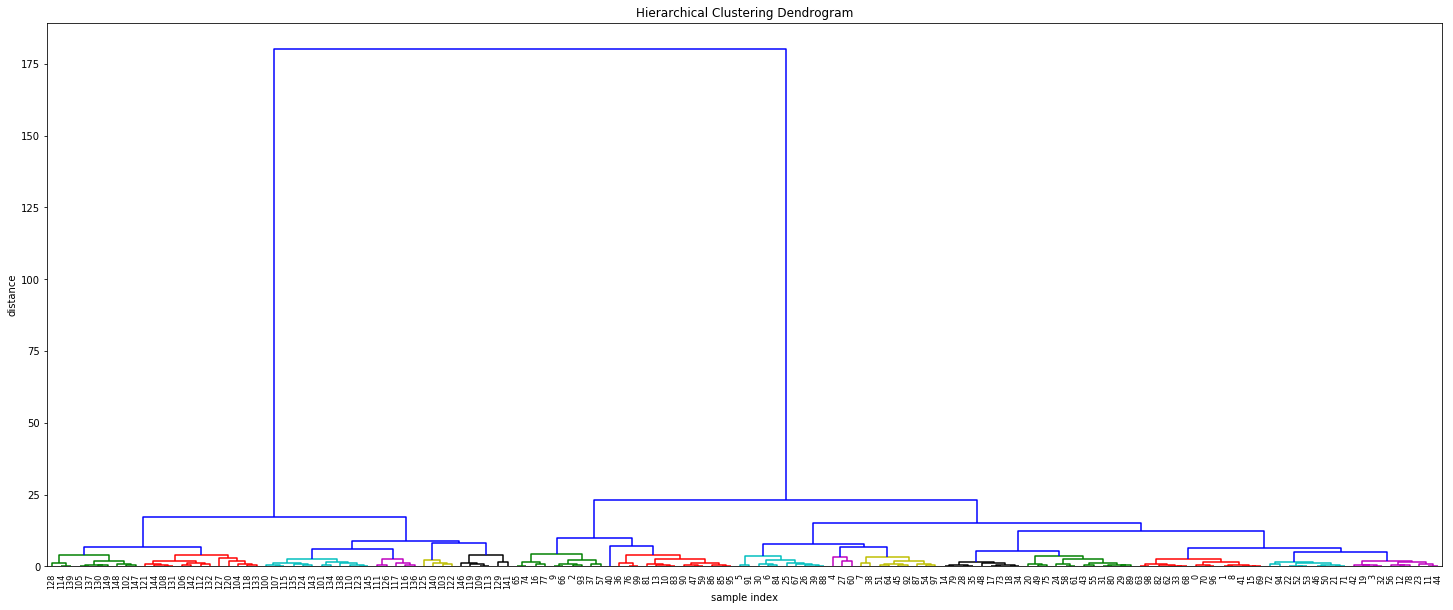

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=5
)
plt.show()

## 클러스터별 색깔 다르게 하기
`color_threshold`

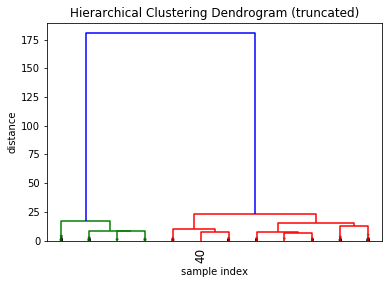

In [26]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last pa merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    color_threshold=50
)
plt.show()

## 압축하기

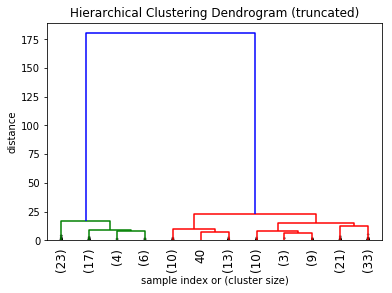

In [19]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## merge될 때 distance를 표시하기

In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

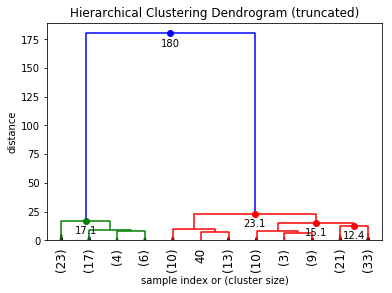

In [21]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## 자르는 기준을 표시하기

In [22]:
max_d = 20  # max_d as in max_distance

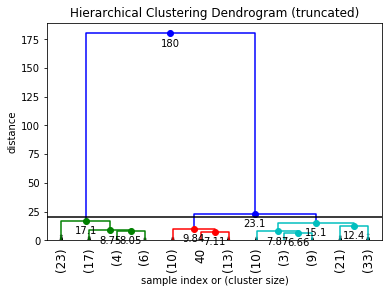

In [23]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

## label 뽑아내기 - max distance로

In [29]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([15, 15,  7, 17, 11, 10, 10, 12, 15,  7,  8, 17, 17,  8, 13, 15,  7,
       13, 13, 17, 14, 16, 16, 17, 14, 10, 10, 11, 13, 14, 10, 14, 17, 15,
       13, 13,  8,  7, 12, 10,  9, 15, 17, 14, 17, 12, 16,  8, 13, 14, 16,
       12, 16, 16, 12, 14, 17,  7, 14,  8, 11, 14, 15, 15, 12,  7,  7, 10,
       15, 15, 15, 16, 16, 13,  7, 14,  8,  7, 17, 13, 14,  8, 15,  8, 10,
        8,  8, 12, 10, 14,  8, 10, 12,  7, 16,  8, 15, 12, 15,  8,  3,  3,
        1,  5,  2,  1,  2,  3,  2,  6,  3,  4,  2,  6,  1,  3,  4,  4,  2,
        6,  2,  2,  5,  3,  3,  5,  4,  2,  1,  6,  1,  2,  2,  2,  3,  3,
        4,  1,  3,  1,  5,  6,  2,  3,  2,  3,  6,  1,  1,  1], dtype=int32)

## label 뽑아내기 - 클러스터 개수로

In [31]:
k=2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Evaluation

In [7]:
import pandas as pd

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [10]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters=8)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
km.labels_

array([7, 7, 3, 3, 4, 7, 7, 4, 7, 3, 2, 7, 3, 2, 1, 7, 3, 1, 1, 3, 1, 3, 3,
       7, 1, 7, 7, 4, 1, 1, 7, 1, 3, 1, 1, 1, 2, 2, 4, 7, 2, 7, 3, 1, 3, 4,
       3, 2, 1, 1, 3, 7, 3, 3, 7, 1, 3, 2, 1, 2, 4, 1, 1, 1, 4, 3, 3, 7, 1,
       7, 7, 3, 3, 1, 3, 1, 2, 3, 3, 1, 1, 2, 1, 2, 7, 2, 2, 1, 7, 1, 2, 7,
       1, 2, 3, 2, 3, 7, 1, 2, 0, 6, 0, 6, 5, 5, 5, 0, 5, 0, 0, 6, 5, 0, 5,
       0, 6, 6, 5, 0, 5, 5, 6, 0, 0, 6, 6, 5, 5, 0, 5, 5, 5, 5, 6, 0, 6, 5,
       6, 5, 6, 0, 5, 0, 5, 0, 0, 5, 0, 5], dtype=int32)

In [36]:
km.predict(X)

array([7, 7, 3, 3, 4, 7, 7, 4, 7, 3, 2, 7, 3, 2, 1, 7, 3, 1, 1, 3, 1, 3, 3,
       7, 1, 7, 7, 4, 1, 1, 7, 1, 3, 1, 1, 1, 2, 2, 4, 7, 2, 7, 3, 1, 3, 4,
       3, 2, 1, 1, 3, 7, 3, 3, 7, 1, 3, 2, 1, 2, 4, 1, 1, 1, 4, 3, 3, 7, 1,
       7, 7, 3, 3, 1, 3, 1, 2, 3, 3, 1, 1, 2, 1, 2, 7, 2, 2, 1, 7, 1, 2, 7,
       1, 2, 3, 2, 3, 7, 1, 2, 0, 6, 0, 6, 5, 5, 5, 0, 5, 0, 0, 6, 5, 0, 5,
       0, 6, 6, 5, 0, 5, 5, 6, 0, 0, 6, 6, 5, 5, 0, 5, 5, 5, 5, 6, 0, 6, 5,
       6, 5, 6, 0, 5, 0, 5, 0, 0, 5, 0, 5], dtype=int32)

In [57]:
X.assign(cluster=km.labels_).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,7
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,7


In [60]:
from tqdm import tqdm_notebook

In [61]:
scores = []
iterations = range(1, 30)
for i in tqdm_notebook(iterations):
    km = KMeans(n_clusters=i)
    km.fit(X)
    s = km.score(X)
    scores.append(s)

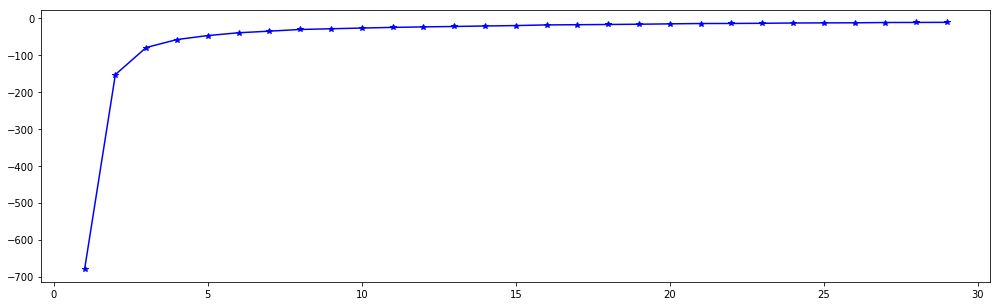

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(17,5))
plt.plot(iterations, scores, 'b*-')

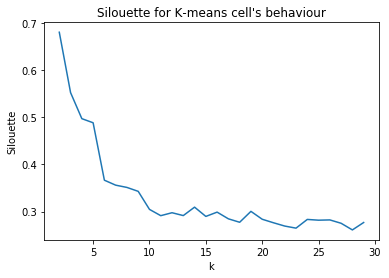

In [66]:
from sklearn.metrics import silhouette_score, silhouette_samples

K = range(2,30)

scores = []
for k in tqdm_notebook(K):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
#     centroids = kmeans.cluster_centers_
    score = silhouette_score(X, labels, metric='euclidean')
    scores.append(score)

plt.plot(K, scores)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")

# Lesson 4-2: EDA

## 4-2-1 : 문제 정의하기

### Mall Customer Segmentation Data 데이터가 주어졌을 때, 고객을 뷴류합니다.

## 4-2-2 : 데이터 확인하기

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
print(os.listdir("./data/mall_customer_seg_data"))

['Mall_Customers.csv']


In [4]:
df = pd.read_csv('./data/mall_customer_seg_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Fe

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Histograms

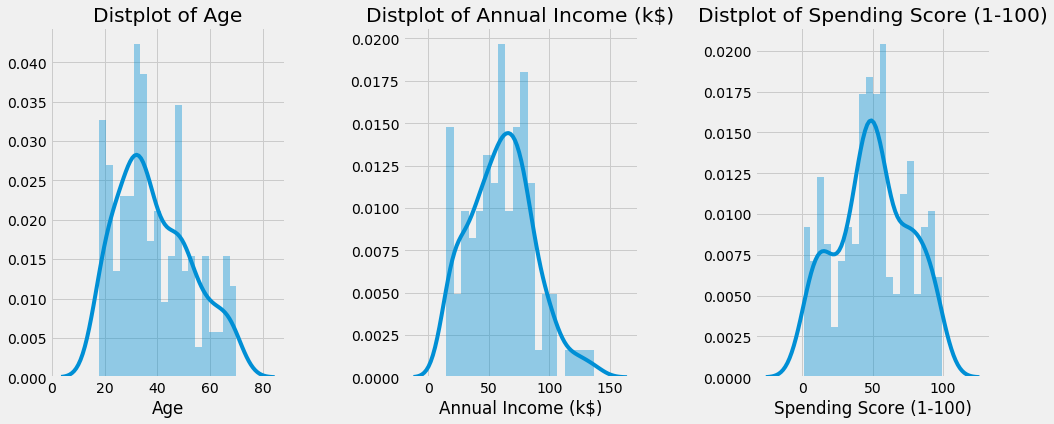

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

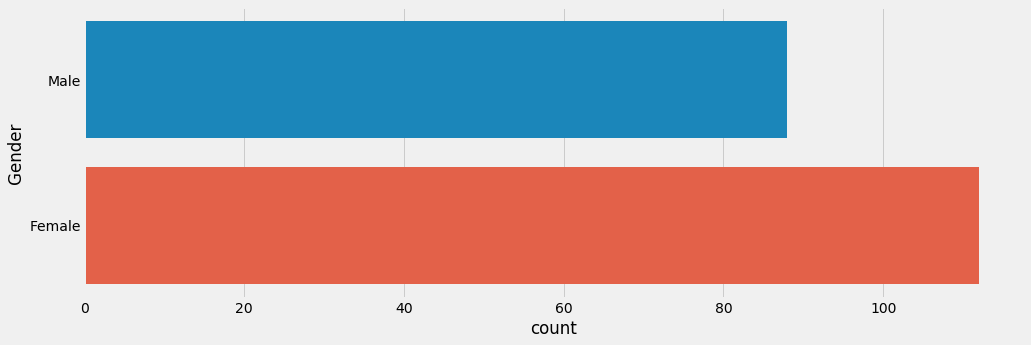

In [12]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

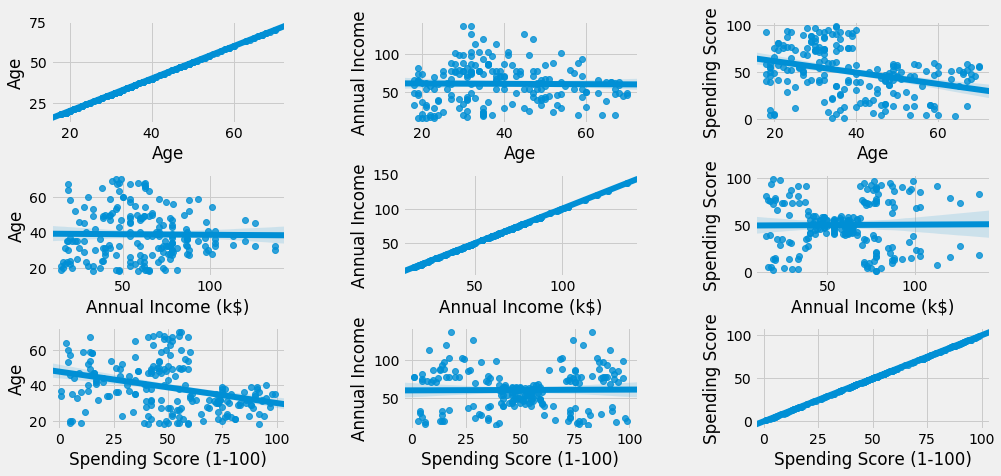

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

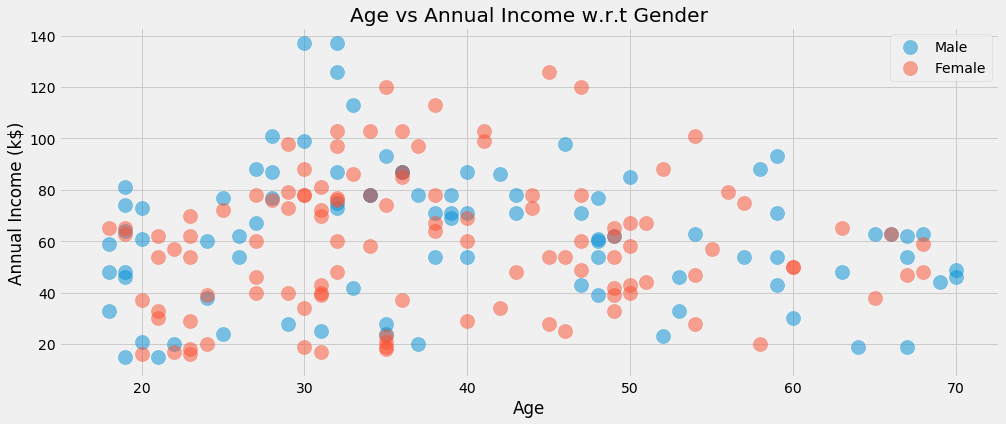

In [14]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

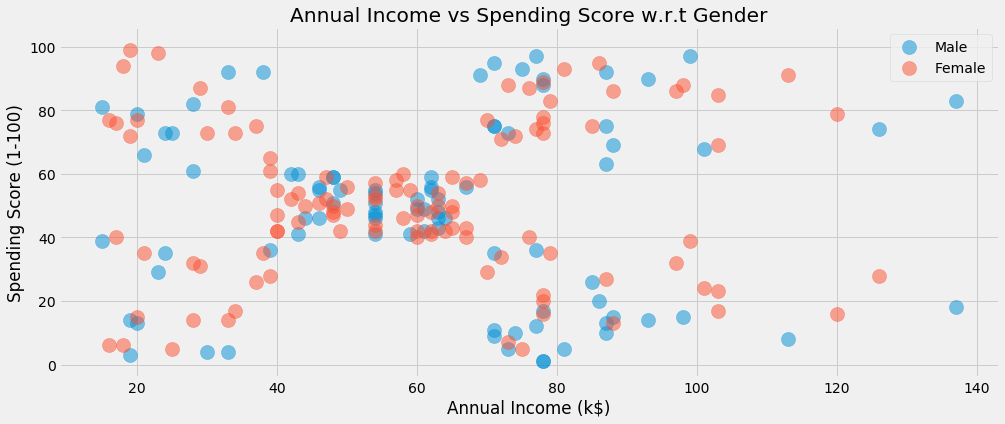

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

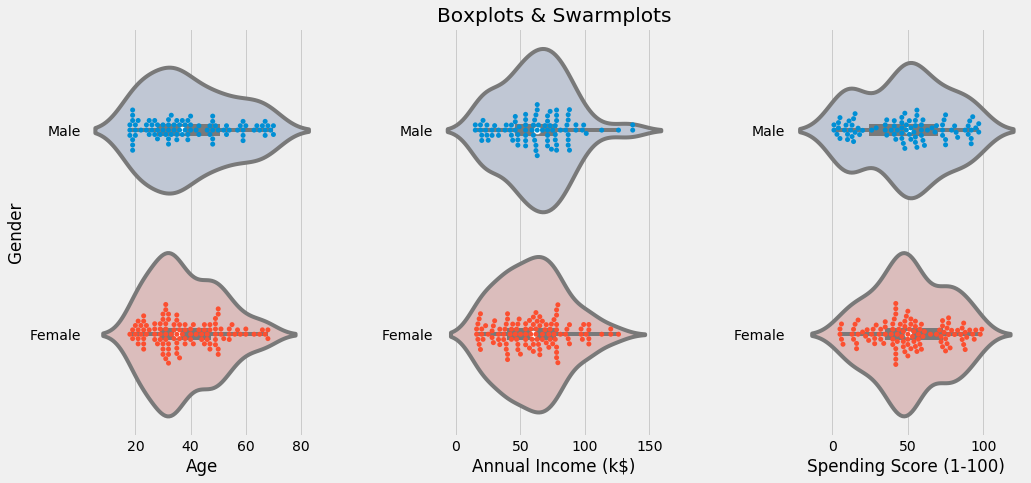

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Lesson 4-3: Preprocessing

Skip

# Lesson 4-4: Model Selection